# Online Shoppers Purchasing Intention

#### **Name**        : Listy Stephen

#### **Organization**: Entri Elevate

#### **Date          :** 23-DEC-2014

### 1. **Overview of Problem Statement:**

The goal of this project is to develop a classification model that predicts whether an e-commerce customer will generate revenue, essentially determining if a customer will make a purchase after browsing the website. The project will focus on enhancing model performance through various improvements. Additionally, it will incorporate a pipeline to seamlessly integrate preprocessing and modeling steps.

### 2. **Objective:**

Predict online shoppers purchase intension using ML algoriths.Thus we can ideantify whether the customer will bring revenue to the business or not.

### 3. **Data Description:**

Source : https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

Out of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

Dataset Characteristics : Multivariate

Subject Area : Business

Feature Type : Integer, Real

Instances : 12330

Features : 17

#### Numerical features used 

| Feature name                | Feature description                                                                                         | Min. value | Max. value | SD      |
|-----------------------------|-------------------------------------------------------------------------------------------------------------|------------|------------|---------|
| Administrative              | Number of pages visited by the visitor about account management                                              | 0          | 27         | 3.32    |
| Administrative duration     | Total amount of time (in seconds) spent by the visitor on account management related pages                   | 0          | 3398       | 176.70  |
| Informational               | Number of pages visited by the visitor about website, communication, and address information of the shopping site | 0          | 24         | 1.26    |
| Informational duration      | Total amount of time (in seconds) spent by the visitor on informational pages                               | 0          | 2549       | 140.64  |
| Product related             | Number of pages visited by visitor about product-related pages                                              | 0          | 705        | 44.45   |
| Product related duration    | Total amount of time (in seconds) spent by the visitor on product-related pages                             | 0          | 63973      | 1912.25 |
| Bounce rate                 | Average bounce rate value of the pages visited by the visitor                                               | 0          | 0.2        | 0.04    |
| Exit rate                   | Average exit rate value of the pages visited by the visitor                                                 | 0          | 0.2        | 0.05    |
| Page value                  | Average page value of the pages visited by the visitor                                                      | 0          | 361        | 18.55   |
| Special day                 | Closeness of the site visiting time to a special day                                                        | 0          | 1.0        | 0.19    |


#### Categorical features used

| Feature name    | Feature description                                                                                      | Number of categorical values |
|-----------------|----------------------------------------------------------------------------------------------------------|------------------------------|
| OperatingSystems | Operating system of the visitor                                                                          | 8                            |
| Browser         | Browser of the visitor                                                                                    | 13                           |
| Region          | Geographic region from which the session has been started by the visitor                                 | 9                            |
| TrafficType     | Traffic source by which the visitor has arrived at the website (e.g., banner, SMS, direct)               | 20                           |
| VisitorType     | Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’                                      | 3                            |
| Weekend         | Boolean value indicating whether the date of the visit is a weekend                                      | 2                            |
| Month           | Month value of the visit date                                                                             | 12                           |
| Revenue         | Class label indicating whether the visit has been finalized with a transaction                           | 2                            |


### 4. **Data Collection:**

#### 4.1 Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [18]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score


#### 4.2 Load Dataset

In [20]:
df=pd.read_csv("online_shoppers_intention.csv")

#### 4.3 Explore Dataset

In [22]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [23]:
df.shape

(12330, 18)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [25]:
#Checking datatypes distribution

In [26]:
#number

df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [27]:
#object
df.select_dtypes(object).describe().T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


In [28]:
#boolean
df.select_dtypes(bool).describe().T

,count,unique,top,freq
Weekend,12330,2,False,9462
Revenue,12330,2,False,10422


### **5. Data Preprocessing - Data Cleaning**

#### 5.1 Checking Missing Values

In [31]:

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### 5.2 Handle Duplicate values

In [33]:

df.duplicated().any()

True

In [34]:
df.duplicated().sum()

125

In [35]:
#Removing duplicates
df.drop_duplicates(keep='first',inplace=True)

In [36]:
#checking again after dropping duplicates
df.duplicated().any()

False

In [37]:
df.duplicated().sum()

0

#### 5.3 Outlier Detection and Handling

##### 5.3.1 Box Plot

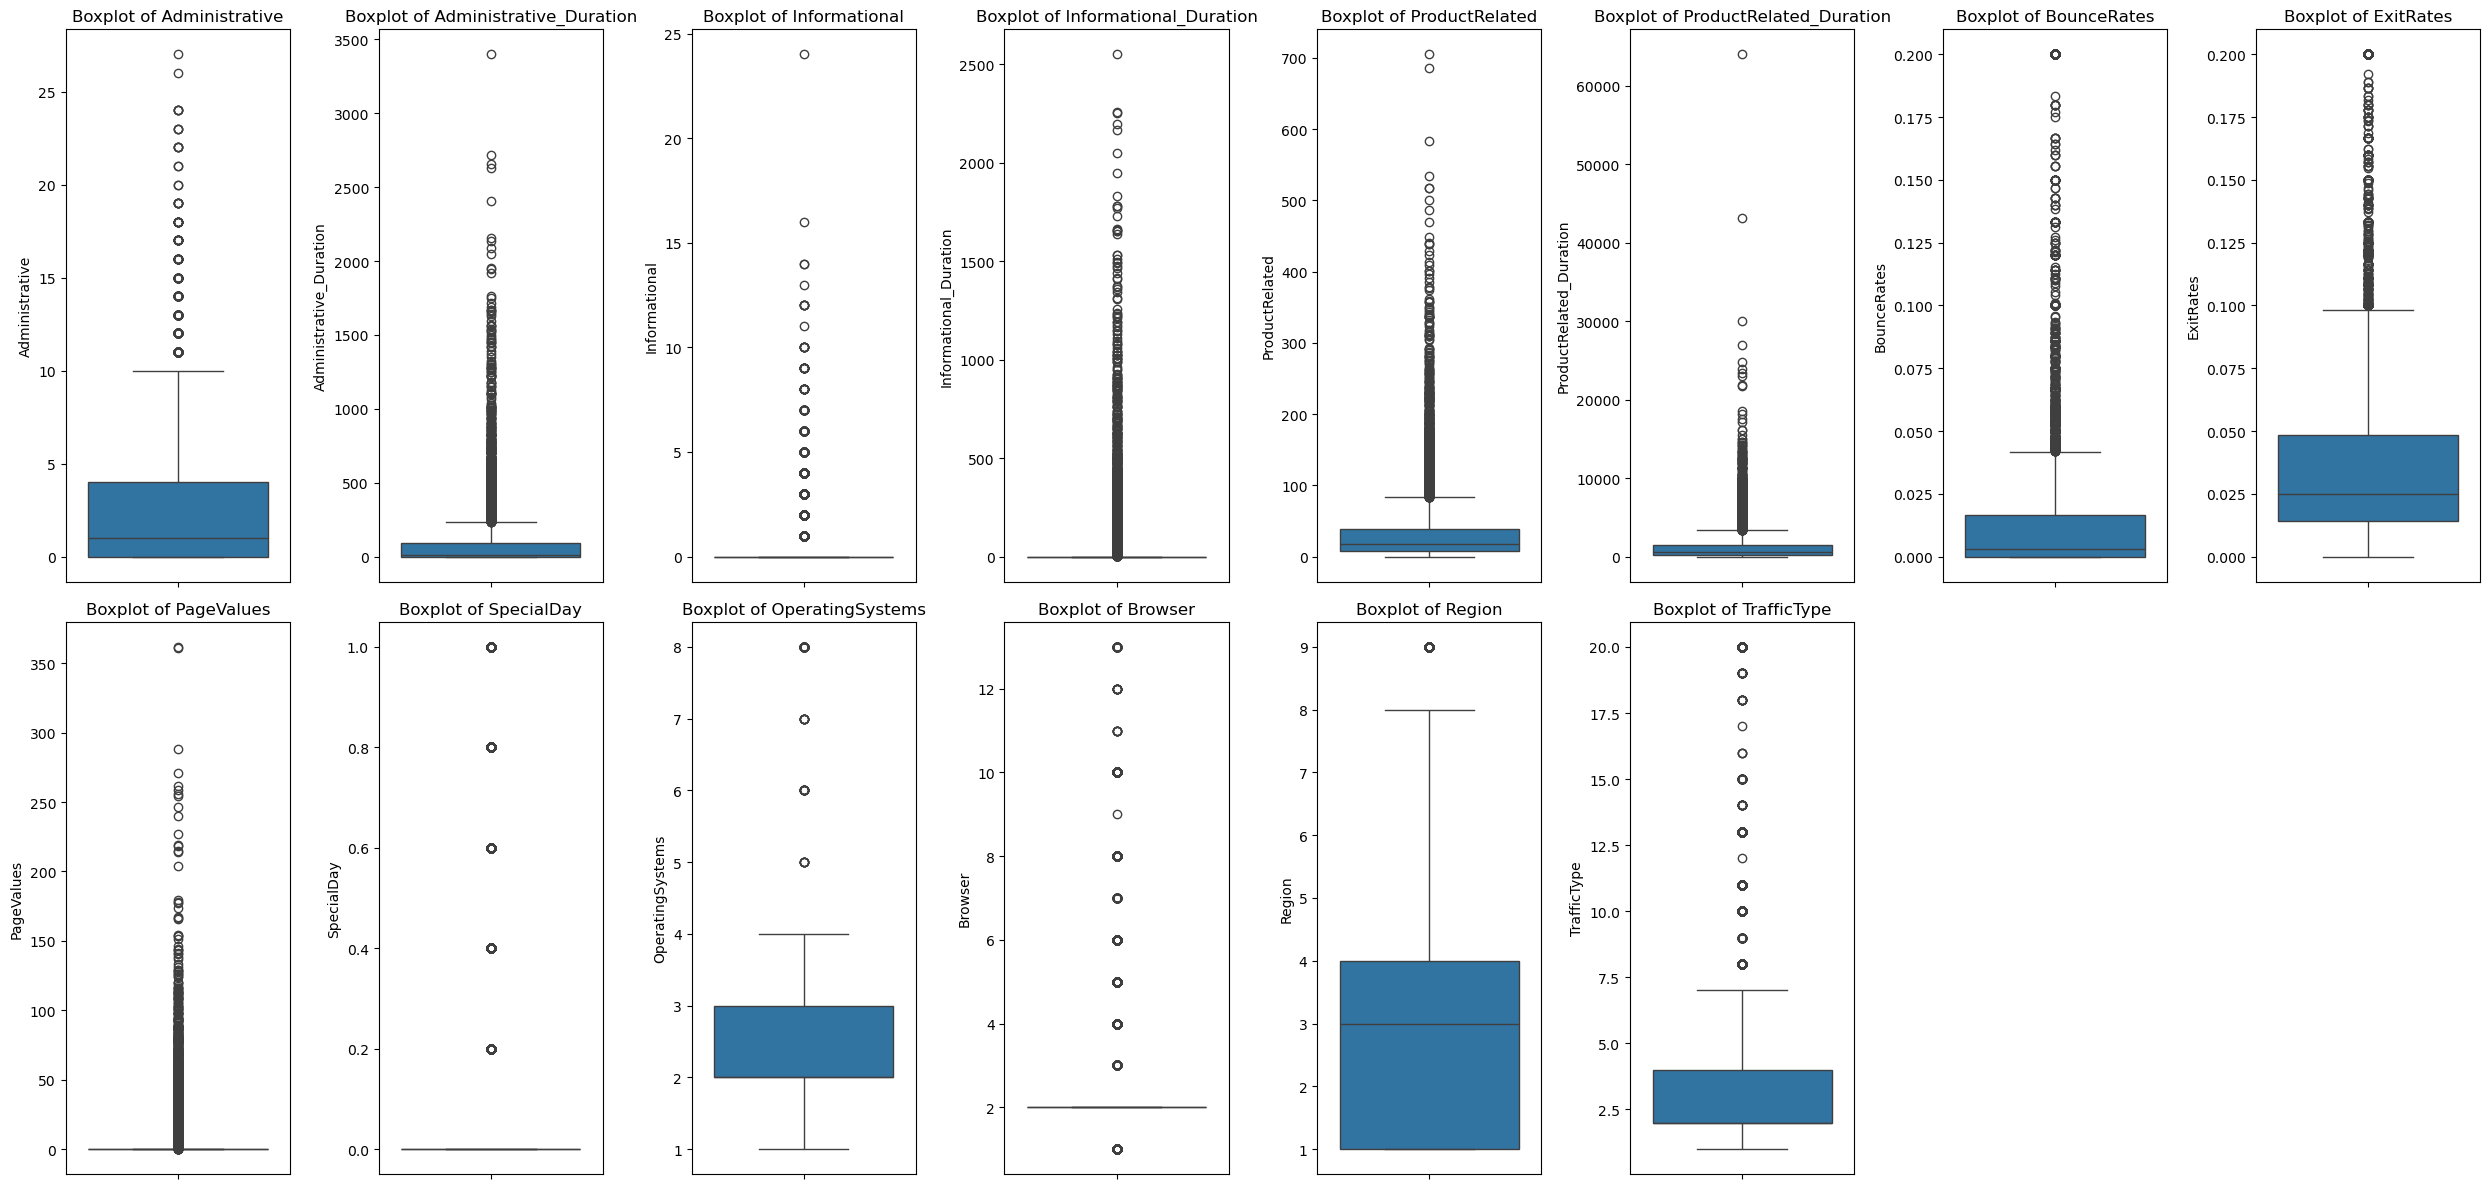

In [40]:


numerical_columns = df.select_dtypes('number').columns

# boxplots for each numerical column
plt.figure(figsize=(25, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns)//2 + 1, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

##### 5.3.2 Outlier handling - IQR method

In [42]:


# Calculate Q1, Q3, and IQR
numerical_data = df.select_dtypes('number')
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = df[~((numerical_data < lower_bound) | (numerical_data > upper_bound)).any(axis=1)]

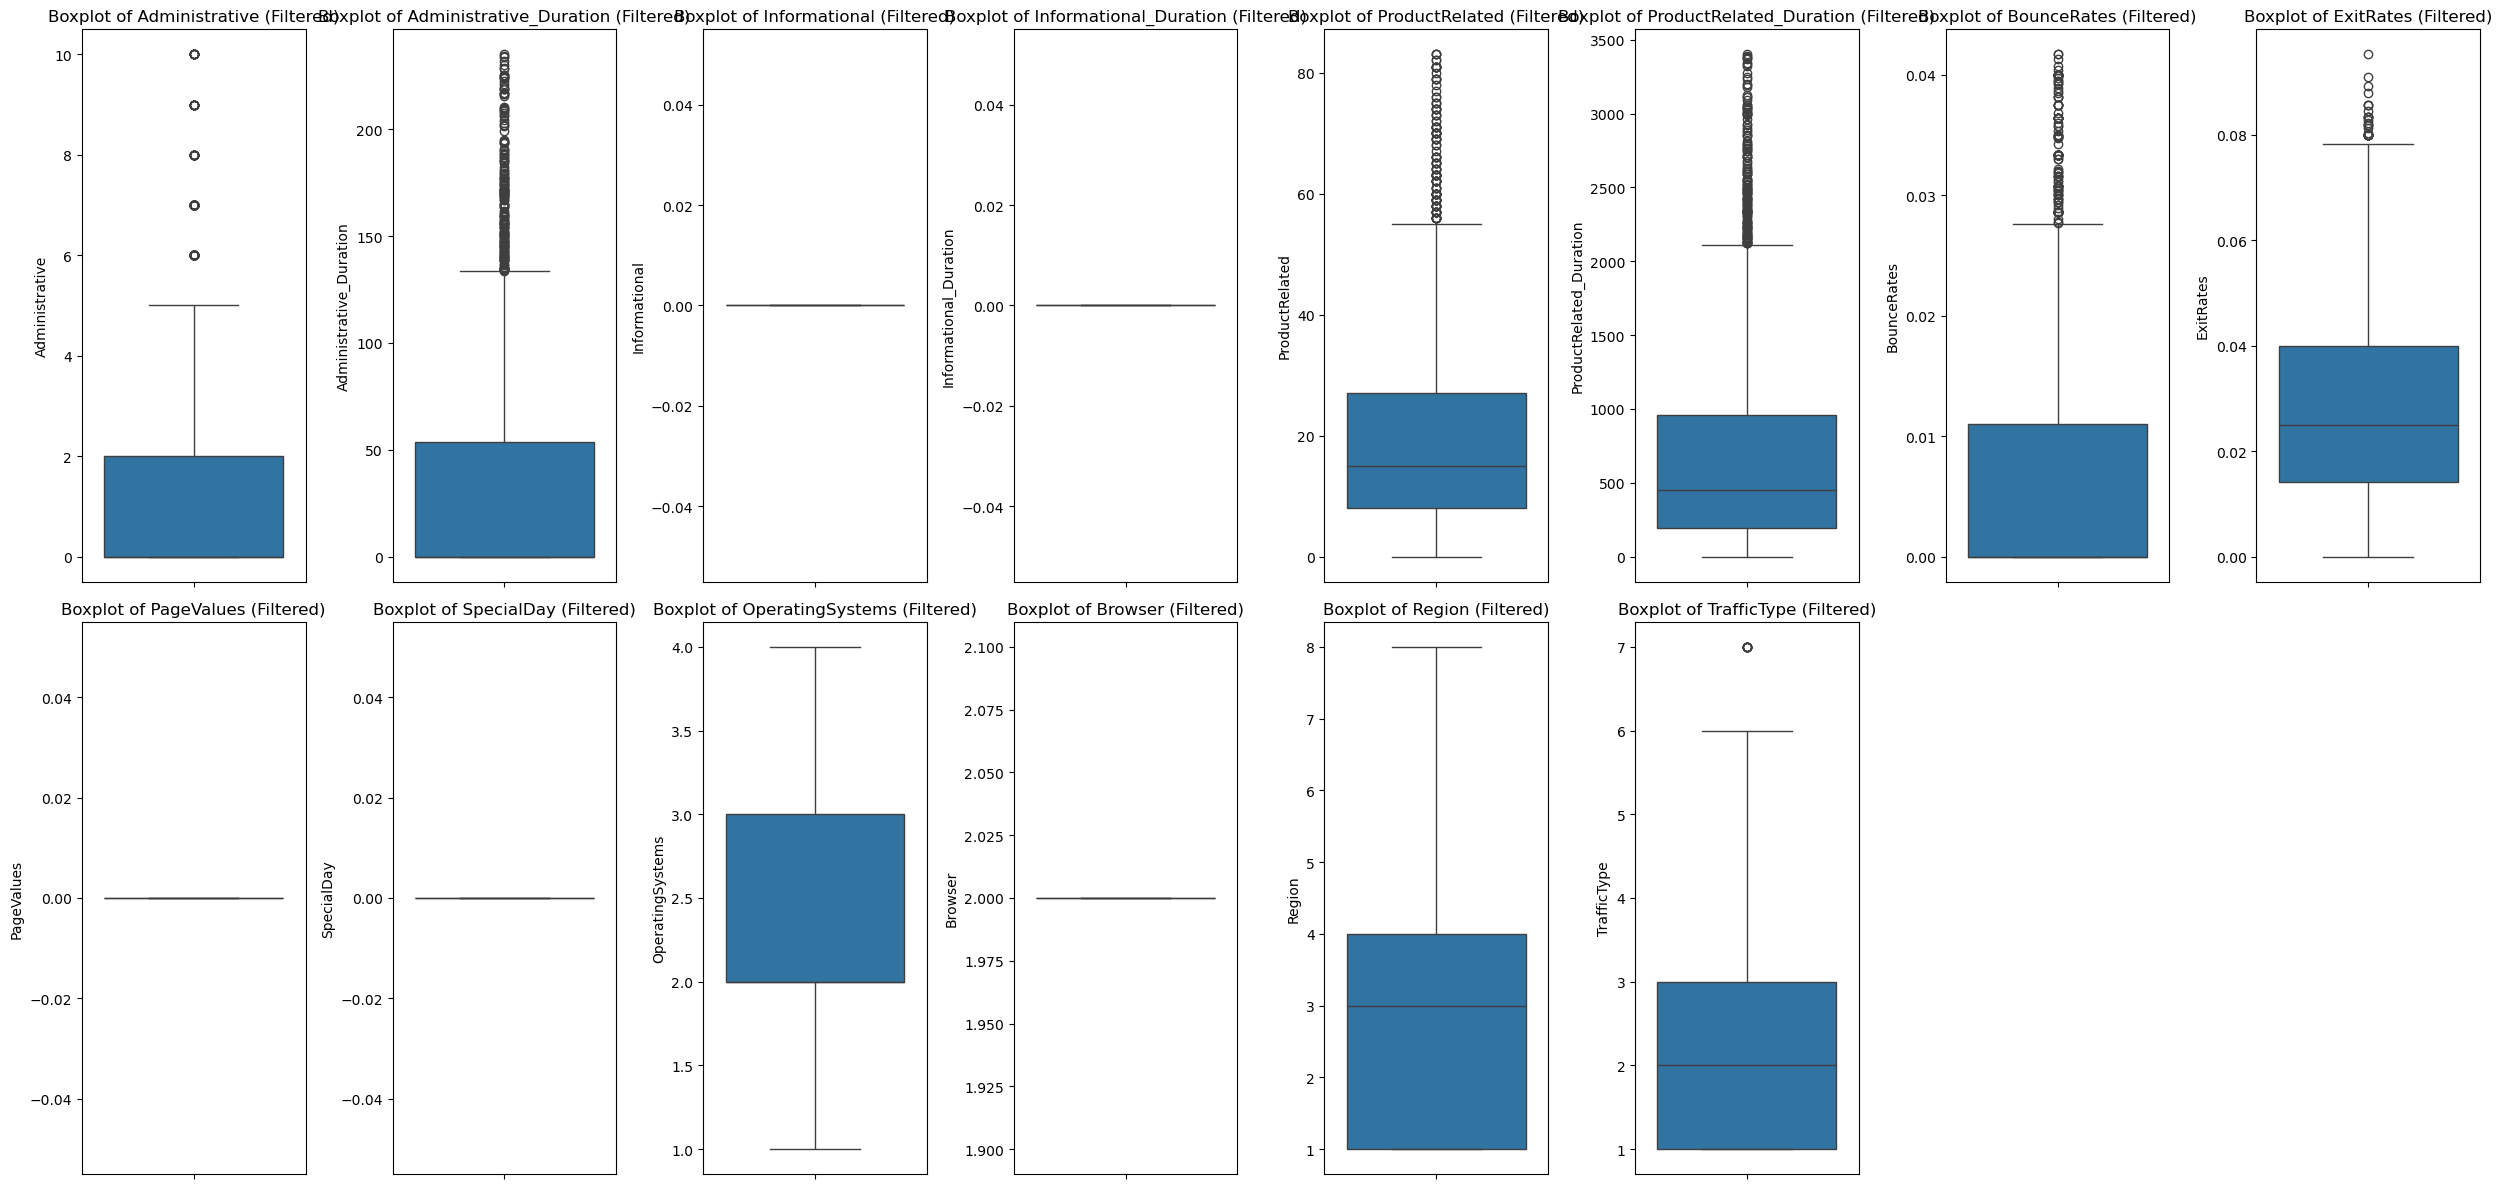

In [43]:
# Visualize the data after removing outliers
plt.figure(figsize=(25, 12))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, len(numerical_columns)//2 + 1, i)
    sns.boxplot(y=filtered_df[col])
    plt.title(f'Boxplot of {col} (Filtered)')
    plt.tight_layout()
plt.show()

##### 5.3.3  Skewness 

In [45]:
# Check skewness of data

skewness = df[numerical_columns].apply(skew)

# Display skewness
print("Skewness of numerical features:")
print(skewness)

# Identify highly skewed features
high_skew = skewness[abs(skewness) > 1]
print("\nHighly skewed features:")
print(high_skew)


Skewness of numerical features:
Administrative             1.946884
Administrative_Duration    5.591464
Informational              4.013679
Informational_Duration     7.539364
ProductRelated             4.332887
ProductRelated_Duration    7.252270
BounceRates                3.162036
ExitRates                  2.234370
PageValues                 6.350202
SpecialDay                 3.285498
OperatingSystems           2.032363
Browser                    3.217009
Region                     0.978360
TrafficType                1.958273
dtype: float64

Highly skewed features:
Administrative             1.946884
Administrative_Duration    5.591464
Informational              4.013679
Informational_Duration     7.539364
ProductRelated             4.332887
ProductRelated_Duration    7.252270
BounceRates                3.162036
ExitRates                  2.234370
PageValues                 6.350202
SpecialDay                 3.285498
OperatingSystems           2.032363
Browser                    3

##### 5.3.4 Handle Skewness

In [47]:
# Handle skewness
# Transformations

# Create a copy for transformations
df_transformed = df.copy()

# Highly skewed features
high_skew_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 
                      'OperatingSystems', 'Browser', 'TrafficType']

# Log Transformation : 
# features with high positive values
log_transform_features = ['Administrative_Duration', 'Informational_Duration', 
                          'ProductRelated_Duration', 'PageValues']

for col in log_transform_features:
    df_transformed[col] = np.log1p(df[col])  # Use log1p to handle zero values

# Square Root Transformation:
# moderately skewed features
sqrt_transform_features = ['Administrative', 'Informational', 'ProductRelated', 'SpecialDay']

for col in sqrt_transform_features:
    df_transformed[col] = np.sqrt(df[col])

# Box-Cox Transformation :
# features with positive skewness
boxcox_transform_features = ['BounceRates', 'ExitRates', 'OperatingSystems', 'Browser']

from scipy.stats import boxcox
for col in boxcox_transform_features:
    df_transformed[col], _ = boxcox(df[col] + 1)  # Add 1 to avoid issues with zero values

In [48]:
# Check Skewness After Transformation

# Recalculate skewness after transformation
new_skewness = df_transformed[high_skew_features].apply(skew)

print("Skewness after transformations:")
print(new_skewness)


Skewness after transformations:
Administrative             0.625226
Administrative_Duration    0.237254
Informational              1.933144
Informational_Duration     1.901872
ProductRelated             1.503169
ProductRelated_Duration   -1.426973
BounceRates                1.010904
ExitRates                  0.411191
PageValues                 1.789387
SpecialDay                 2.858300
OperatingSystems          -0.009847
Browser                   -0.001798
TrafficType                1.958273
dtype: float64


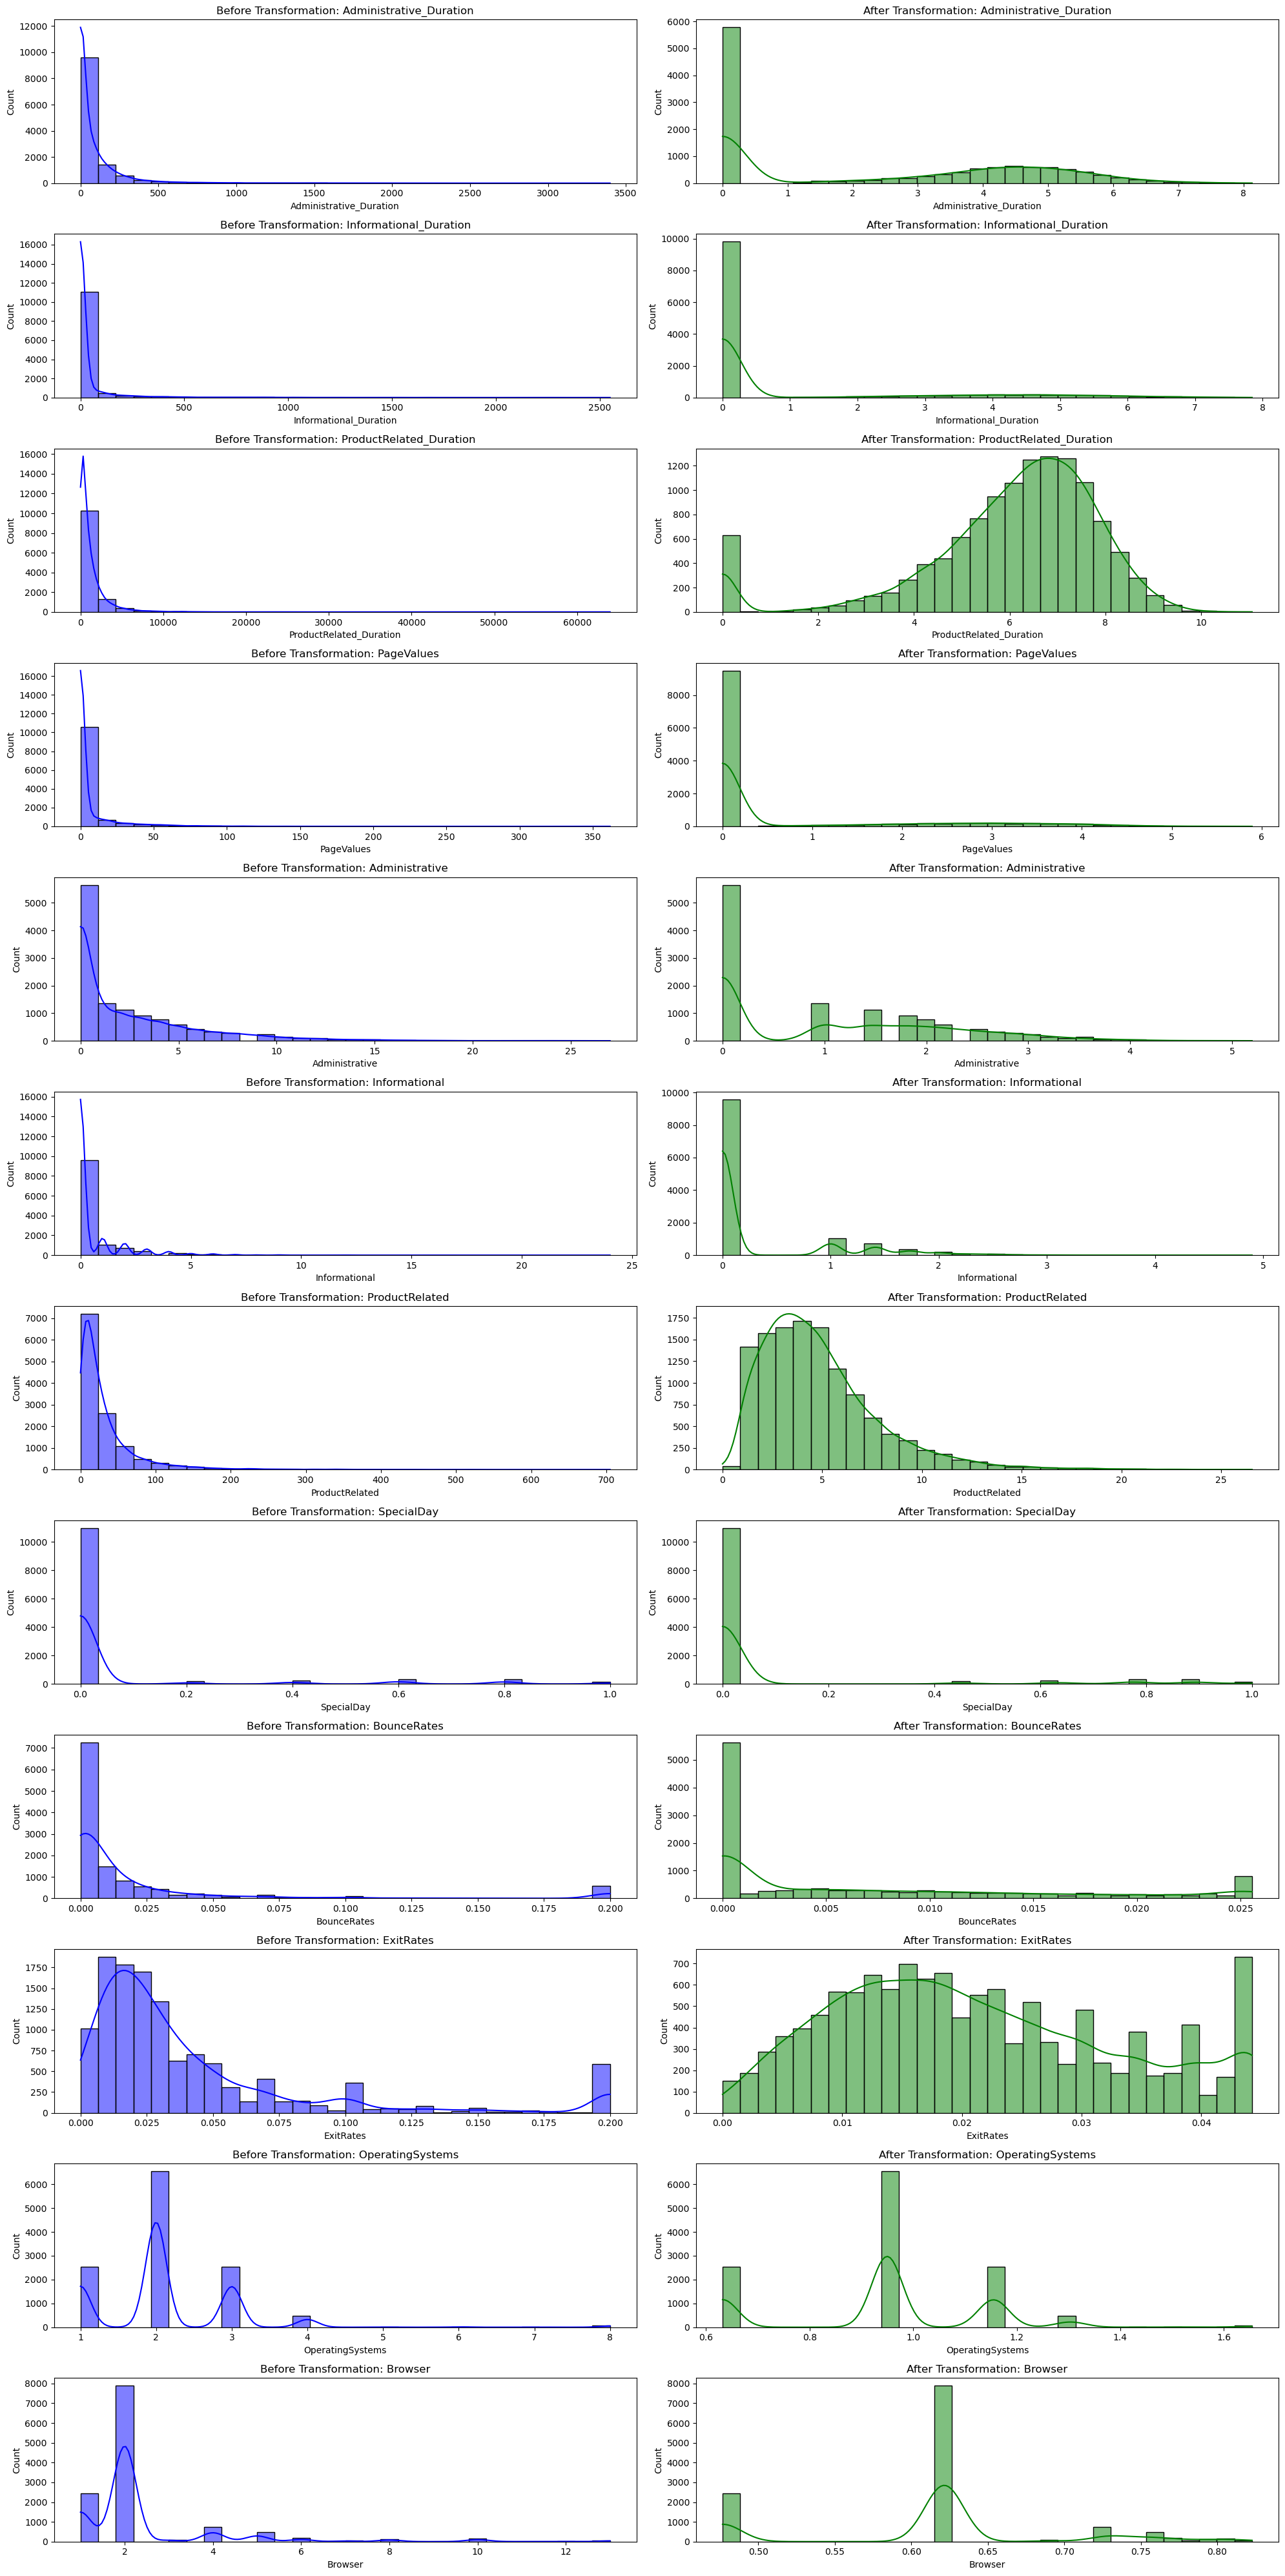

In [49]:
# Visualize Before and After Transformation 

# Combine all transformed features
transformed_features = log_transform_features + sqrt_transform_features + boxcox_transform_features


plt.figure(figsize=(20, 40))
for i, col in enumerate(transformed_features):
    # Original Distribution
    plt.subplot(len(transformed_features), 2, i * 2 + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Before Transformation: {col}")
    plt.xlabel(col)
    
    # Transformed Distribution
    plt.subplot(len(transformed_features), 2, i * 2 + 2)
    sns.histplot(df_transformed[col], kde=True, bins=30, color='green')
    plt.title(f"After Transformation: {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### 6. **Exploratory Data Analysis (EDA):**

#### 6.1 Pair Plot

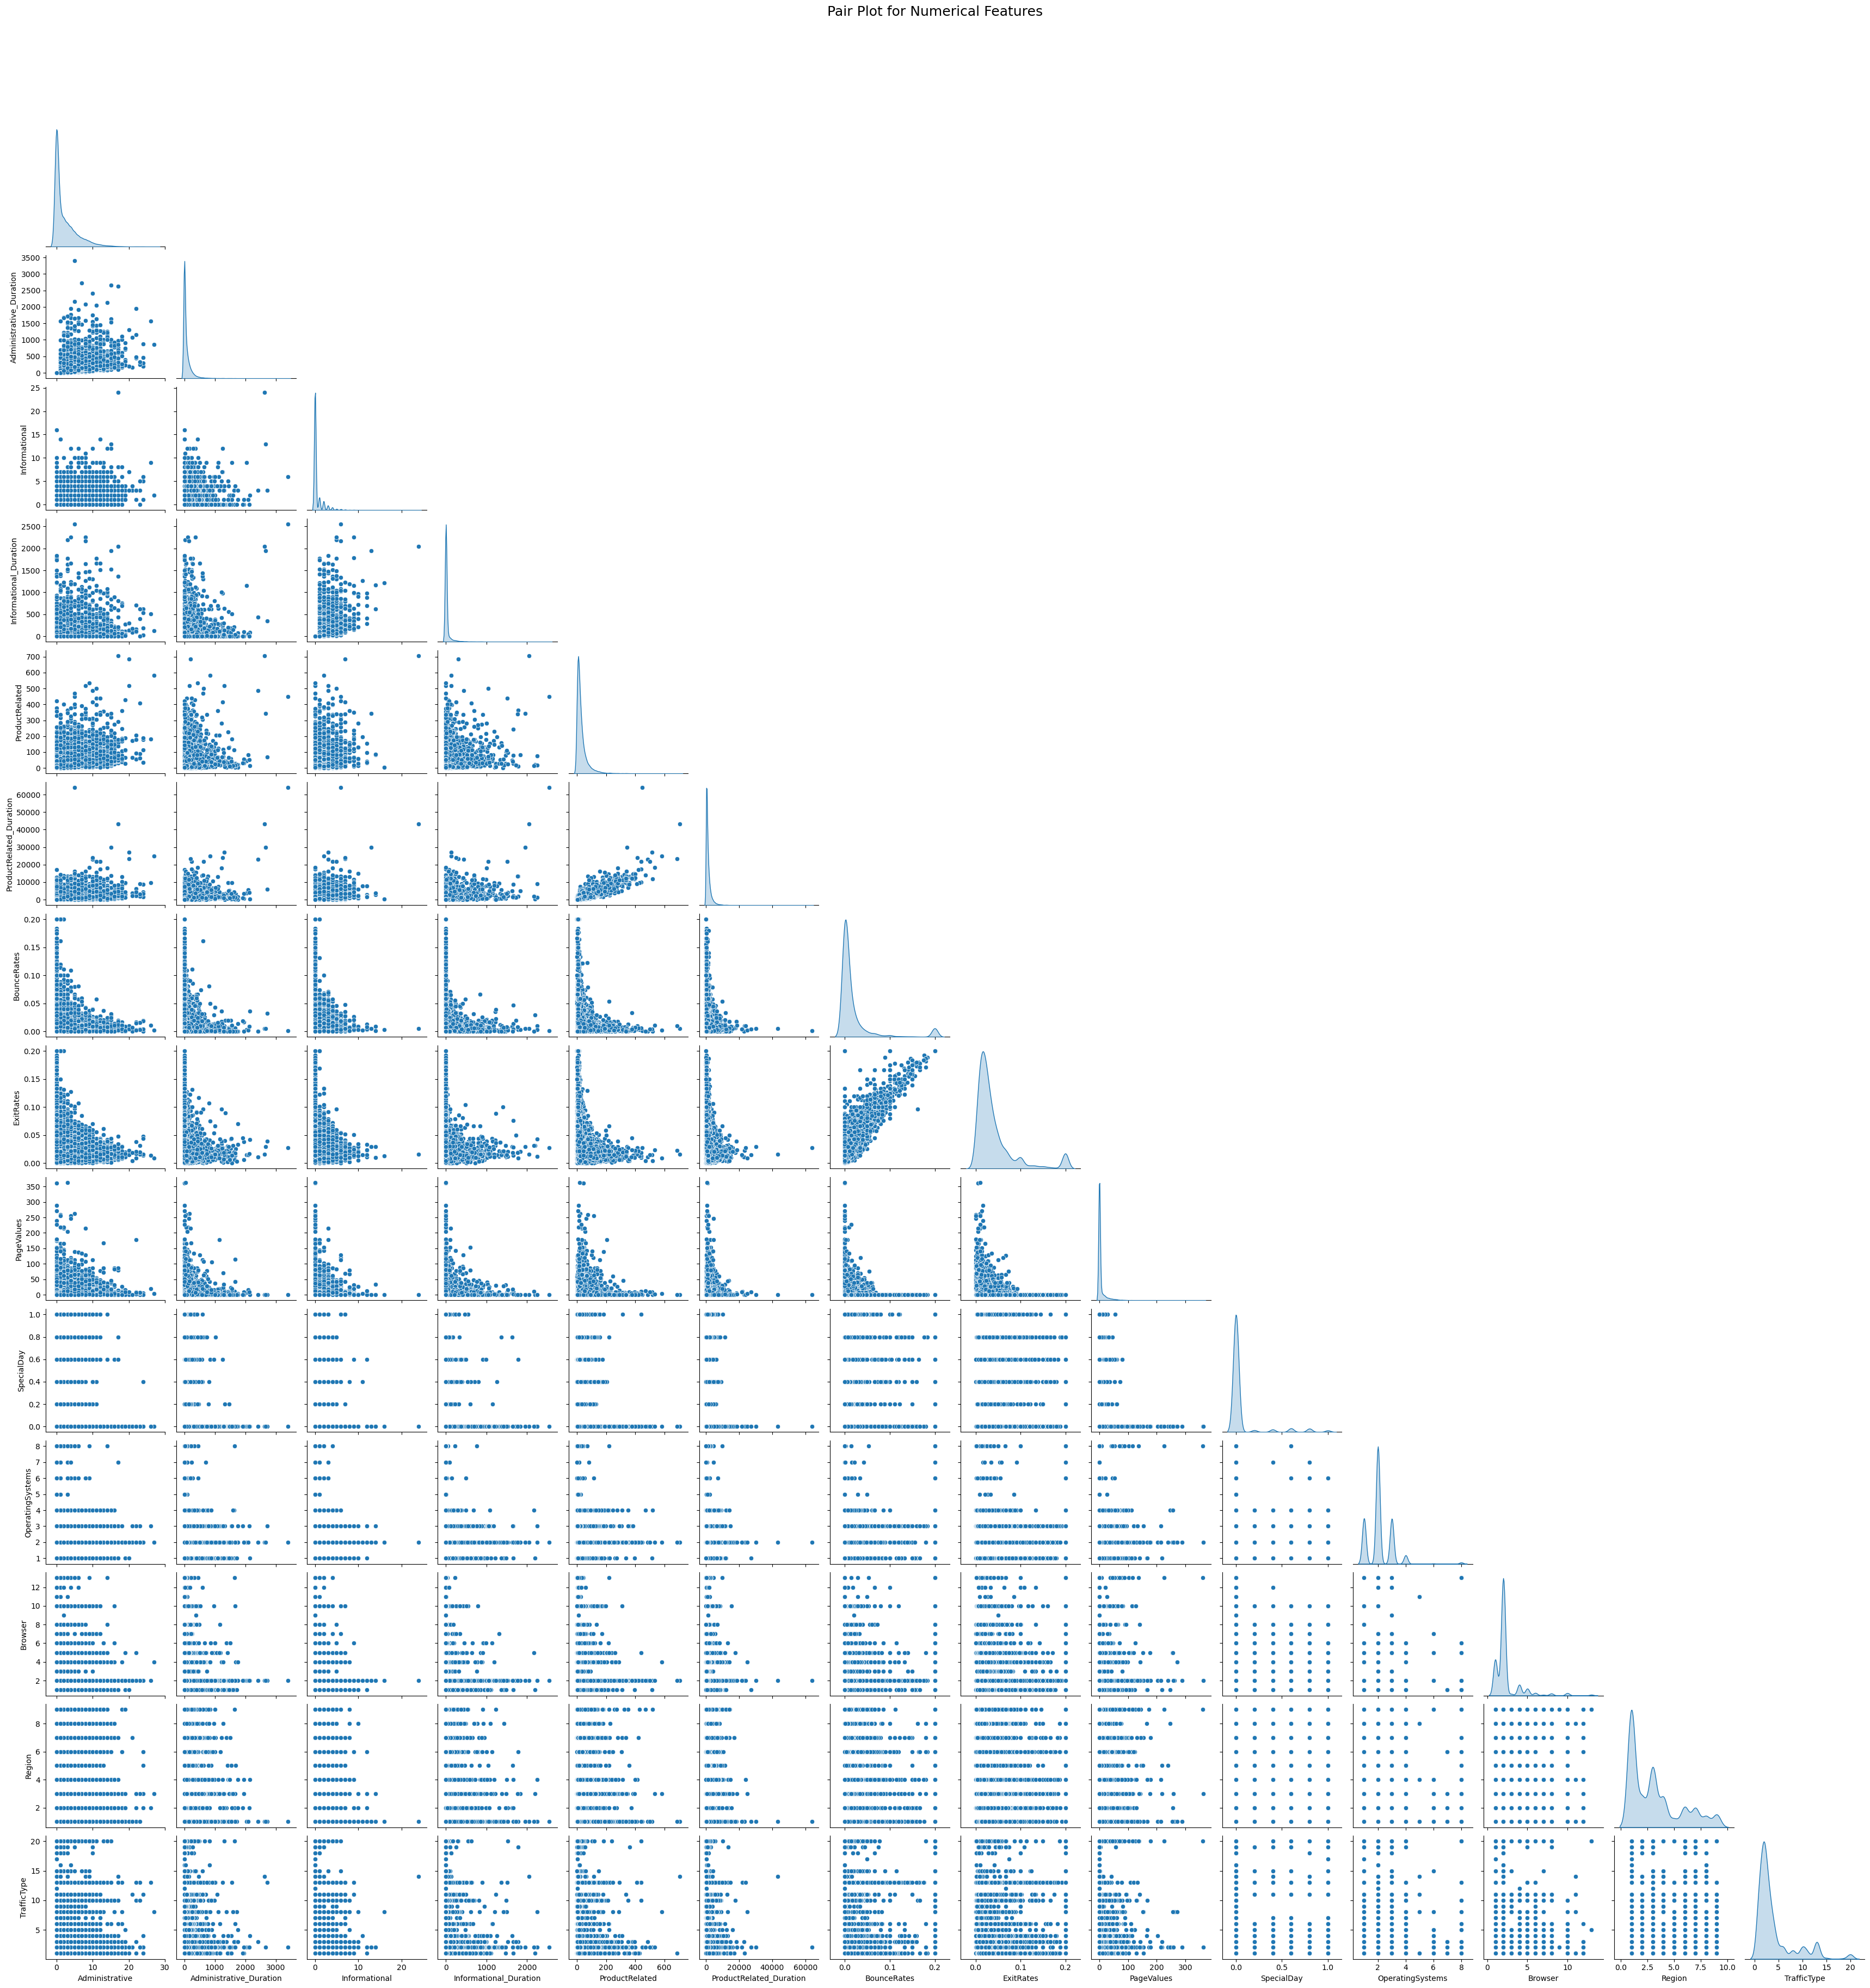

In [52]:

# To explore relationships between multiple numerical features.
sns.pairplot(df[numerical_columns], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot for Numerical Features", fontsize=18, y=1.05)
plt.show()


#### 6.2 Heatmap Correlation

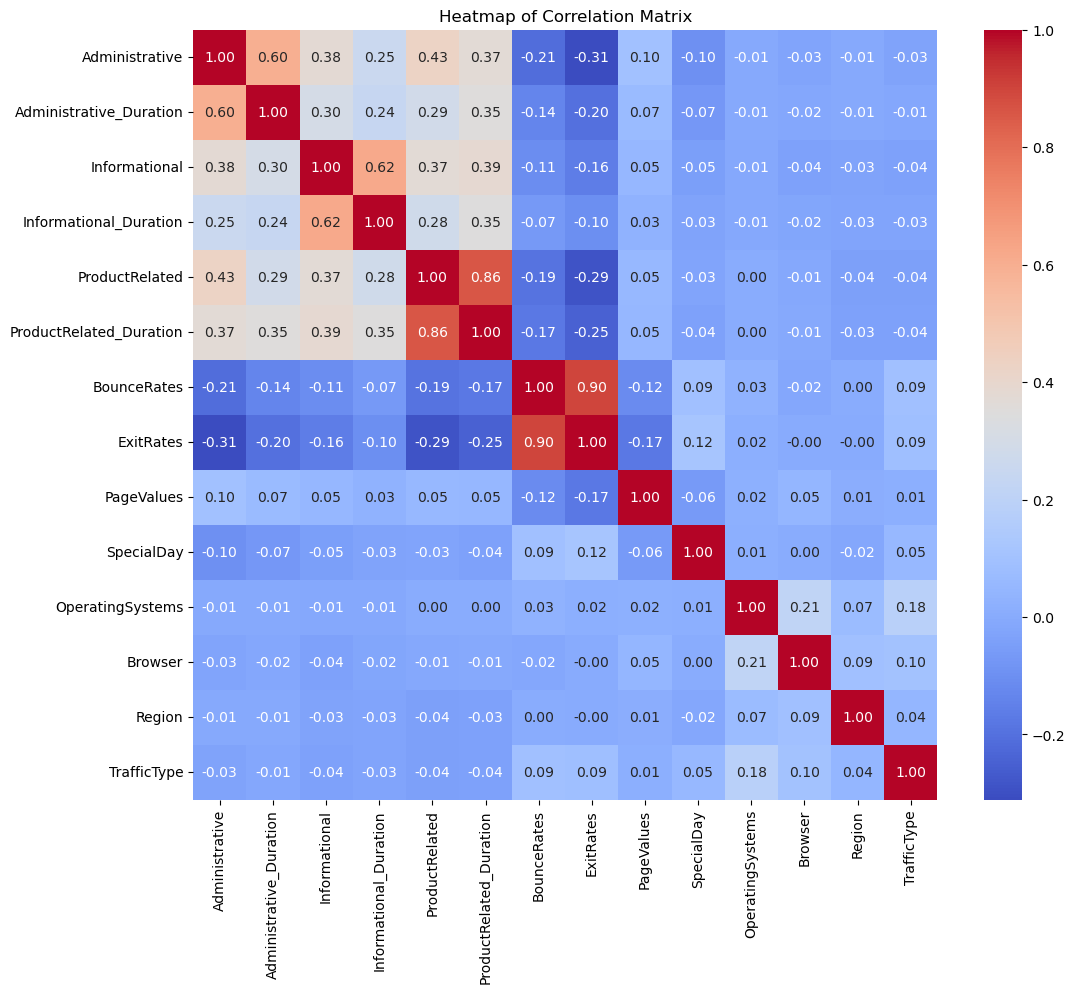

In [54]:

# To check for strong correlations or patterns among numerical features

# Compute correlation matrix
correlation_matrix = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlation Matrix", fontsize=12)
plt.show()


#### 6.3 Pie Diagram

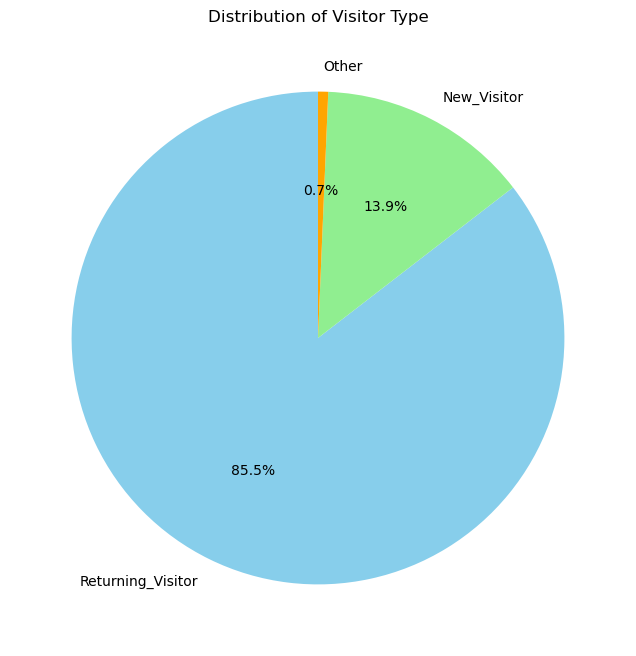

In [56]:

# To visualize proportions of categorical features.
# Example: Distribution of 'VisitorType'
plt.figure(figsize=(8, 8))
df['VisitorType'].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, colors=['skyblue', 'lightgreen', 'orange'])
plt.title("Distribution of Visitor Type")
plt.ylabel("")
plt.show()


#### 6.4 Bar Plot

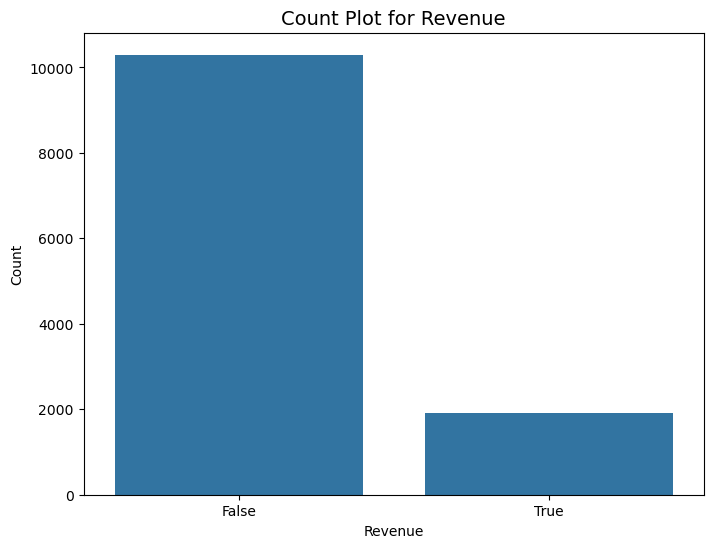

In [58]:

# To compare frequencies of categorical data or aggregated numerical data

# Example: Bar plot for 'Revenue' counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Revenue')
plt.title("Count Plot for Revenue", fontsize=14)
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

#### 6.5 Count Plot

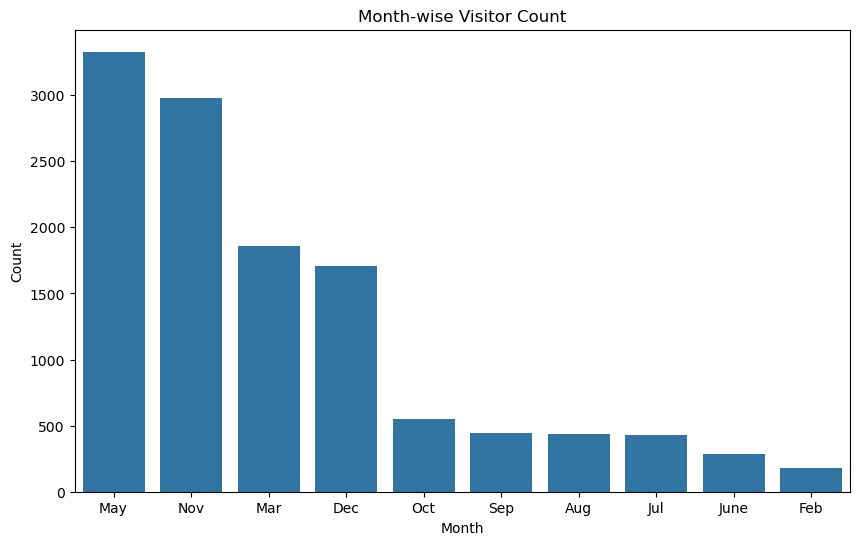

In [60]:

# To visualize the frequency distribution of categorical features.
# Example: Count plot for 'Month'

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', order=df['Month'].value_counts().index)
plt.title("Month-wise Visitor Count")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


#### 6.6 Line Plot

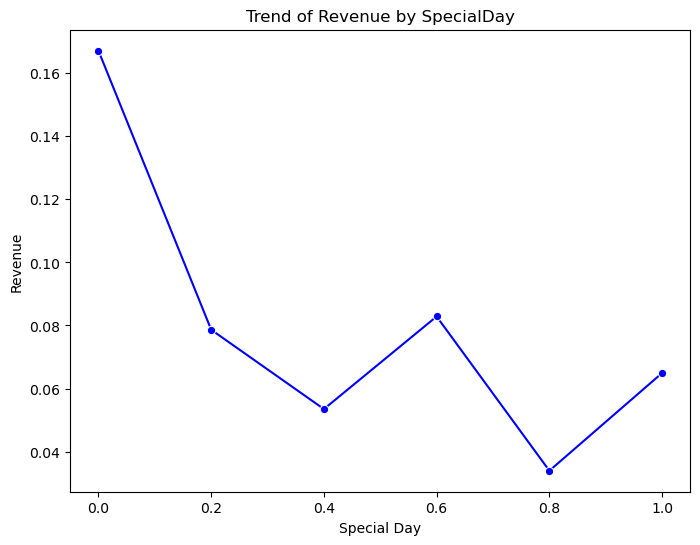

In [62]:

# To show trends over time or ordered categories.

# Example: Line plot of 'SpecialDay' vs. 'Revenue'
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='SpecialDay', y='Revenue', errorbar=None, marker='o', color='blue')
plt.title("Trend of Revenue by SpecialDay")
plt.xlabel("Special Day")
plt.ylabel("Revenue")
plt.show()

#### 6.7 Bivariate Distribution 

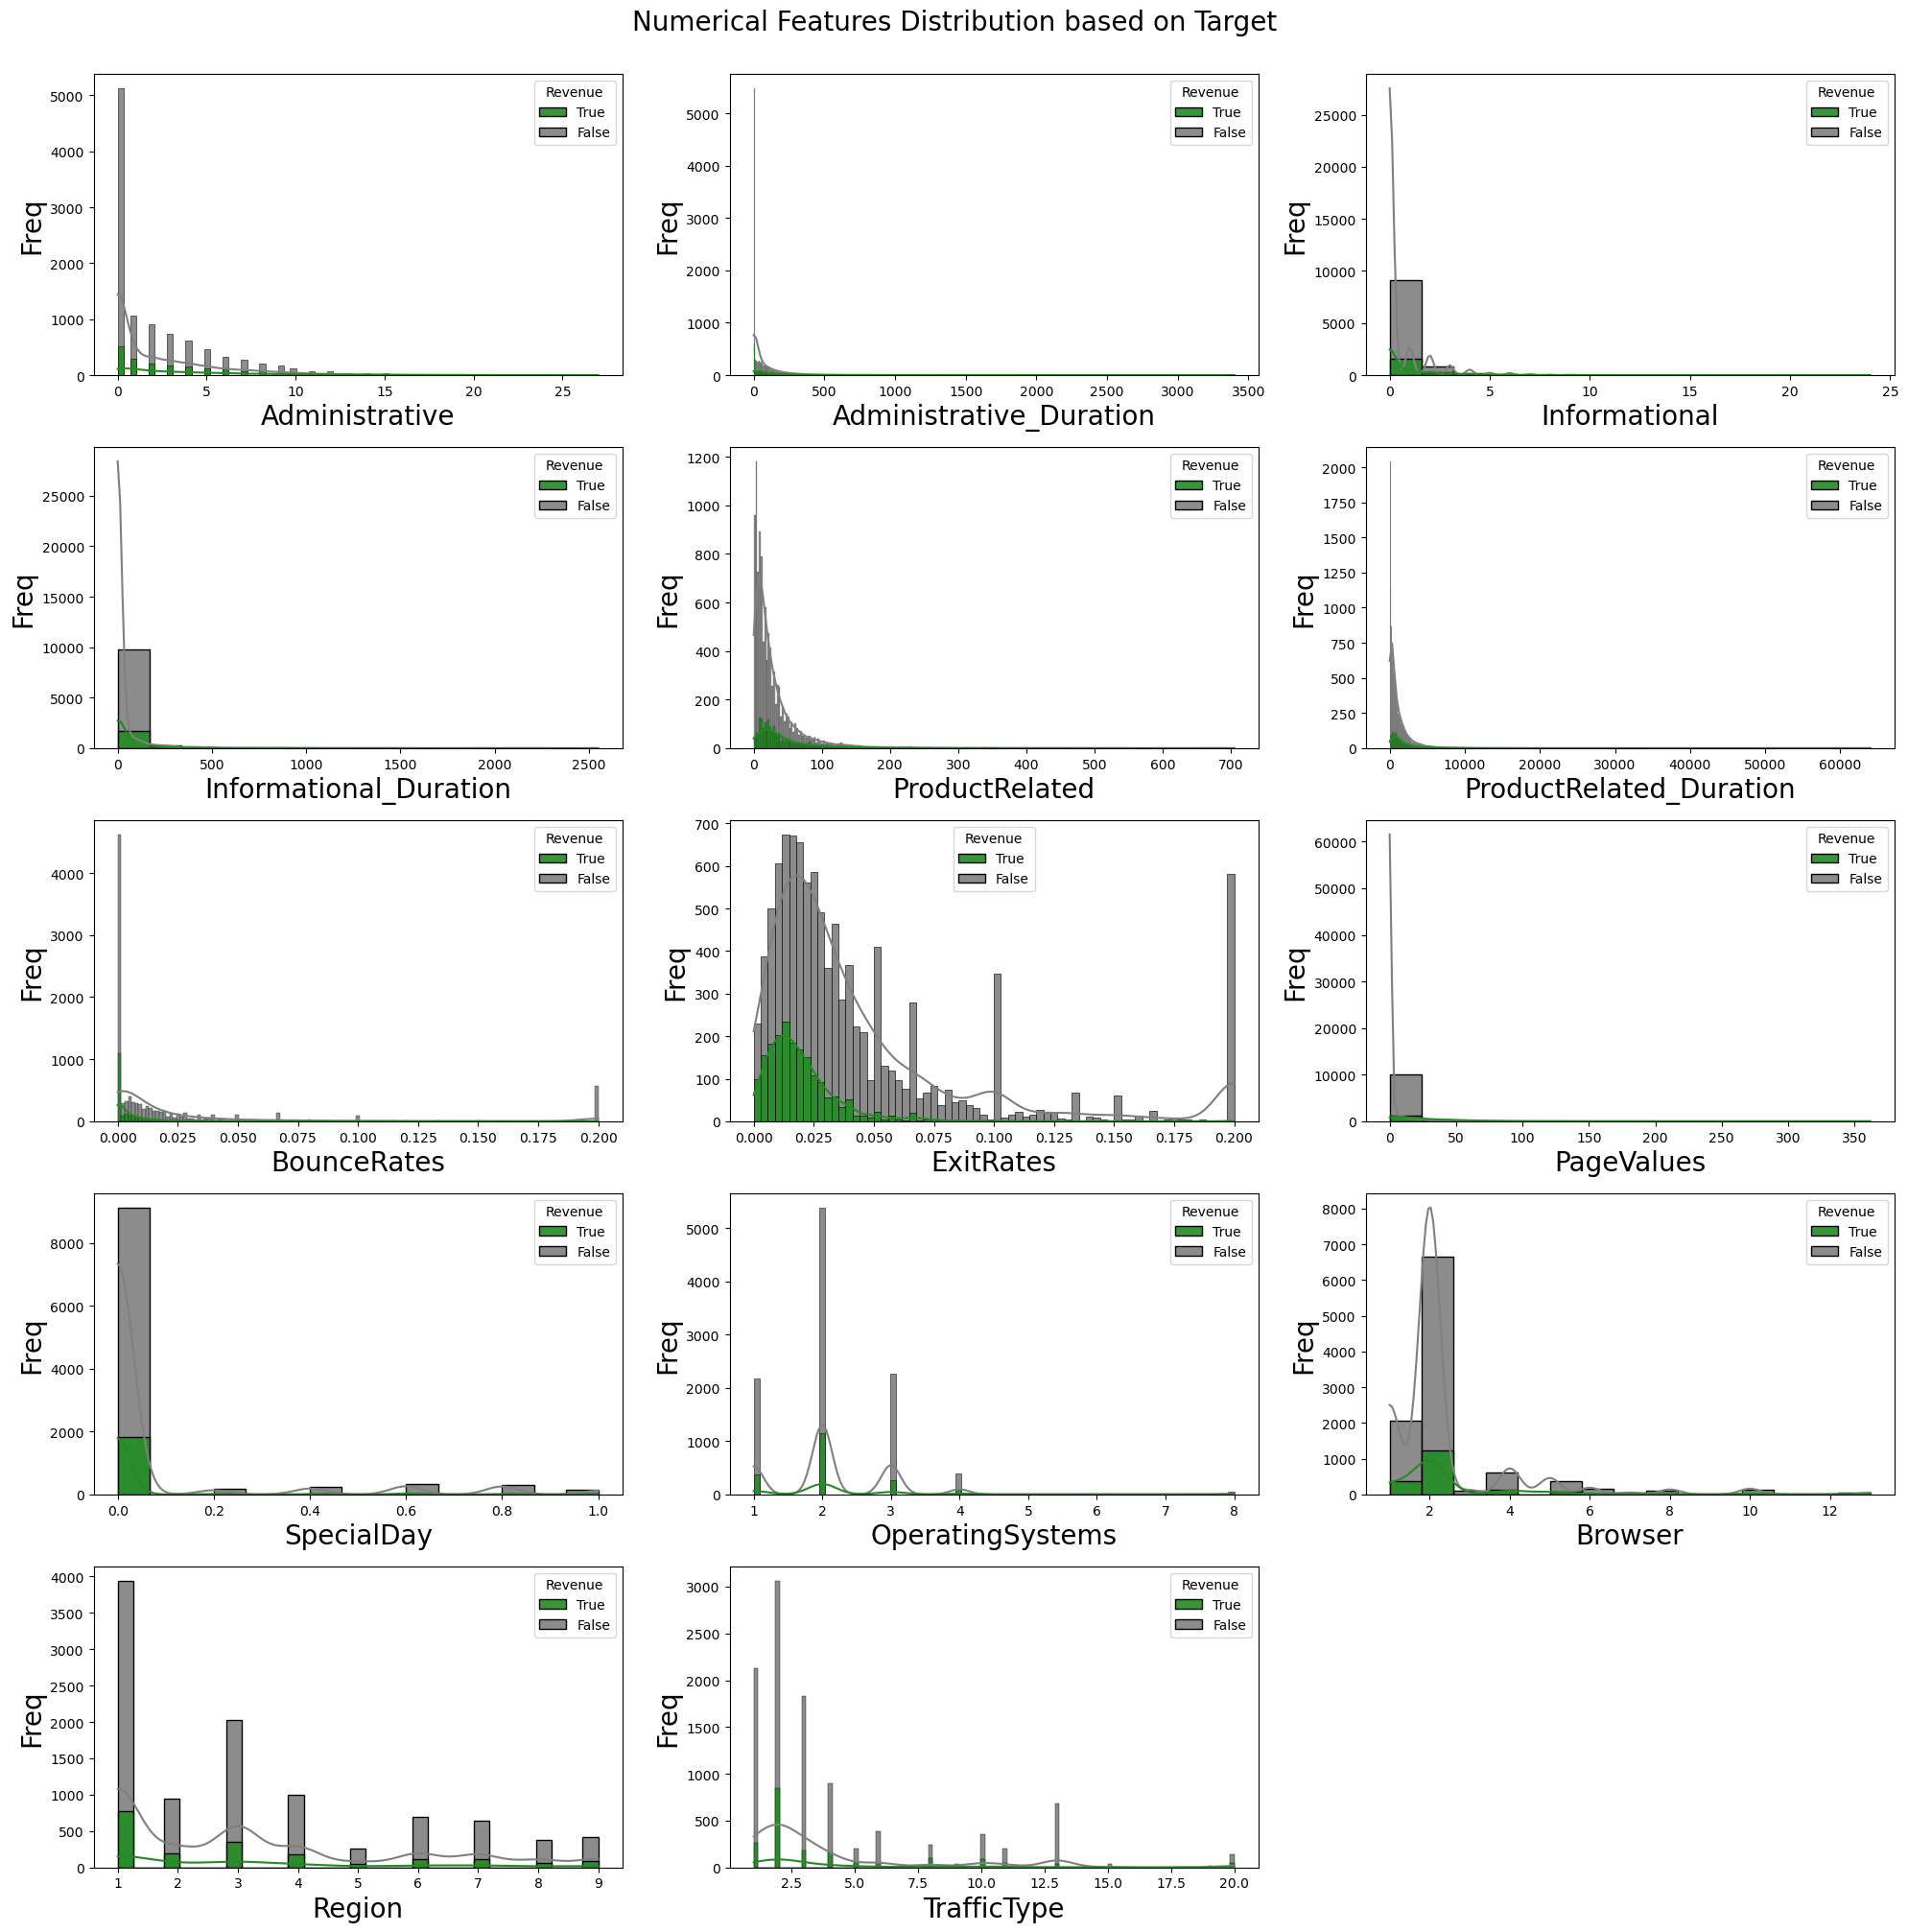

In [64]:

# Checking the distribution of the numerical feature with its target variable (Revenue).
# Those who ended up buying or revenue class = 1, are in green. Those who didn't end up buying represented by the color gray.

palette = {True : '#228B22', False : '#808080'}

plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 20, y = 1.005)
for i in range(len(numerical_columns)):
    plt.subplot(len(numerical_columns)//3+1, 3, i+1)
    ax = sns.histplot(
        x = df[numerical_columns[i]],
        kde = True,
        hue = df['Revenue'],
        hue_order = [True, False],
        palette = palette, alpha = 0.9
    )
    ax.set_xlabel(numerical_columns[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
plt.tight_layout()
plt.show()


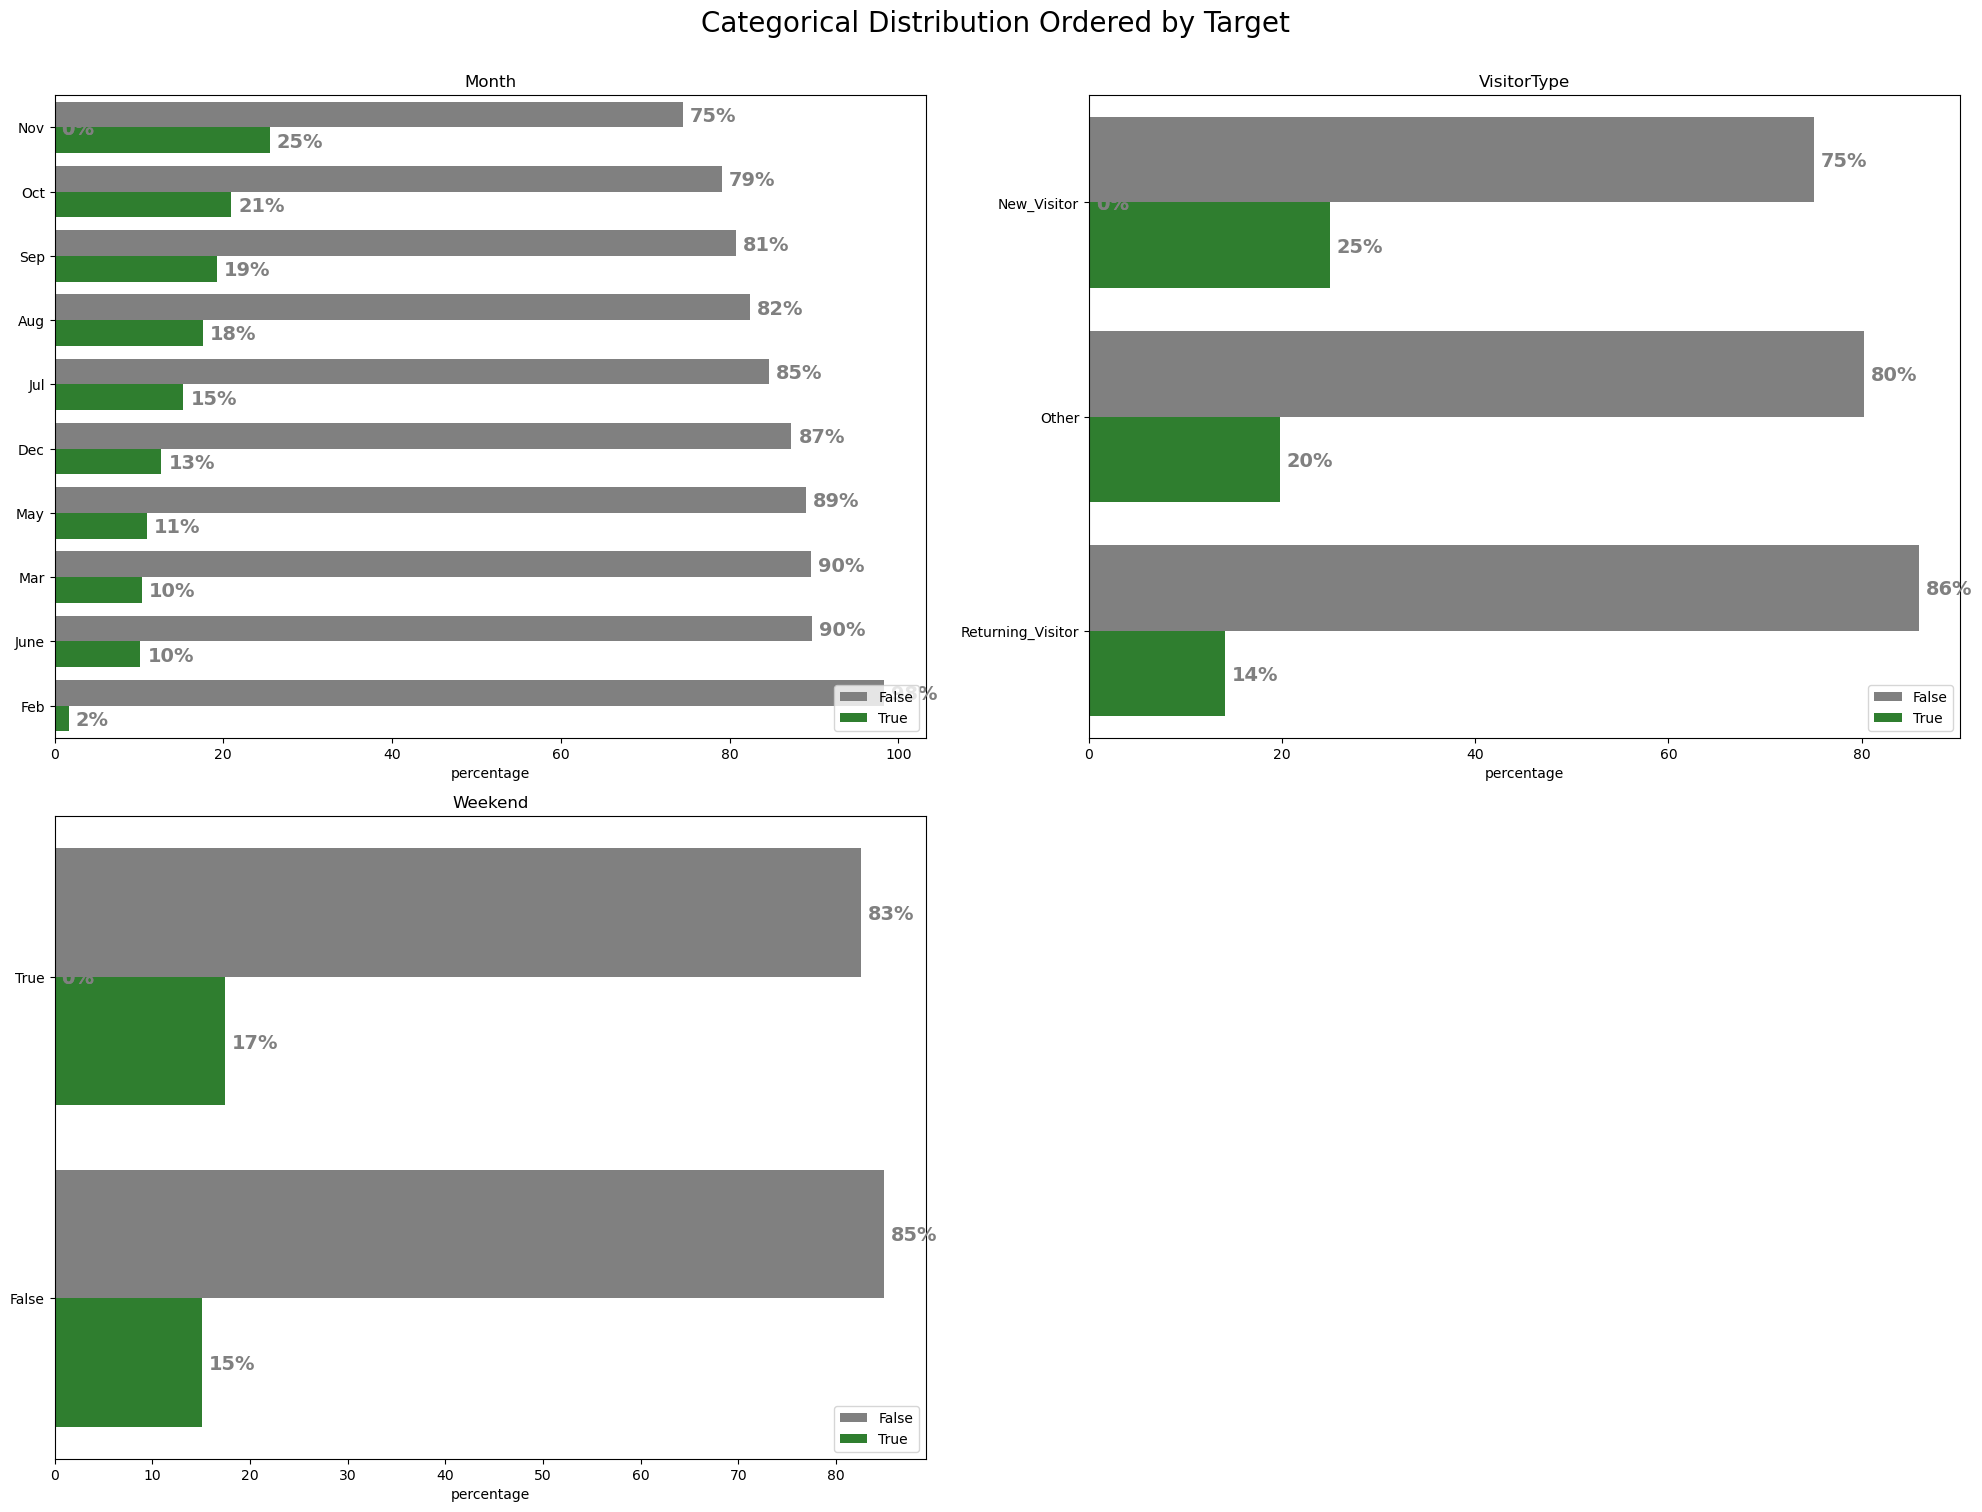

In [65]:
# Categorical Distribution Ordered by Terget (Revenue)

categorical_cols = df.drop(columns=['Revenue']).select_dtypes([object, bool]).columns.tolist()

plt.figure(figsize=(20, 15))
plt.suptitle('Categorical Distribution Ordered by Target', fontsize=20, y = 1.005)
for i in range(len(categorical_cols)):
    
    # create percentage df
    dist = df.groupby([str(categorical_cols[i]), "Revenue"]).count()[["Administrative"]]
    cat_group = df.groupby([str(categorical_cols[i])]).count()[["Administrative"]]
    dist["percentage"] = dist.div(cat_group, level = str(categorical_cols[i])) * 100
    dist.reset_index(inplace = True)
    dist.columns = [str(categorical_cols[i]), "Revenue", "count", "percentage"]
    
    if dist.columns[0] == 'Weekend':
        dist['Weekend'] = dist['Weekend'].astype(str)
    # plot
    plt.subplot(len(categorical_cols)//2+1, 2, i+1)
    ax = sns.barplot(
        x = "percentage",
        y = str(categorical_cols[i]),
        data = dist,
        hue = 'Revenue',
        order = dist.iloc[dist[dist['Revenue'] == True]['percentage'].sort_values(ascending = False).index][str(categorical_cols[i])],
        palette = palette
    )
    ax.set_ylabel('')
    ax.set_title(categorical_cols[i])
    
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f') + "%",
            (p.get_width(), p.get_y() + p.get_height() / 2.), 
            ha = 'left',
            fontweight = "bold",
            xytext = (5,-5), 
            textcoords = 'offset points',
            color = 'gray', fontsize=14
        )
    ax.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

### **7. Feature Engineering**

#### 7.1  Label Encoding

In [68]:

#taking a copy of dataframe
df_encoder=df_transformed.copy()


# Apply Label Encoding on 
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_encoder[col] = label_encoder.fit_transform(df[col])

# Check the transformed DataFrame
print(df_encoder[categorical_cols].head())


   Month  VisitorType  Weekend
0      2            2        0
1      2            2        0
2      2            2        0
3      2            2        0
4      2            2        1


### **8. Feature Selection**

#### 8.1 Random Forest for Feature Importance

                    Feature  Importance
8                PageValues    0.384021
5   ProductRelated_Duration    0.091678
7                 ExitRates    0.086698
4            ProductRelated    0.073025
1   Administrative_Duration    0.057650
6               BounceRates    0.056459
10                    Month    0.042989
0            Administrative    0.041498
14              TrafficType    0.030913
13                   Region    0.029900


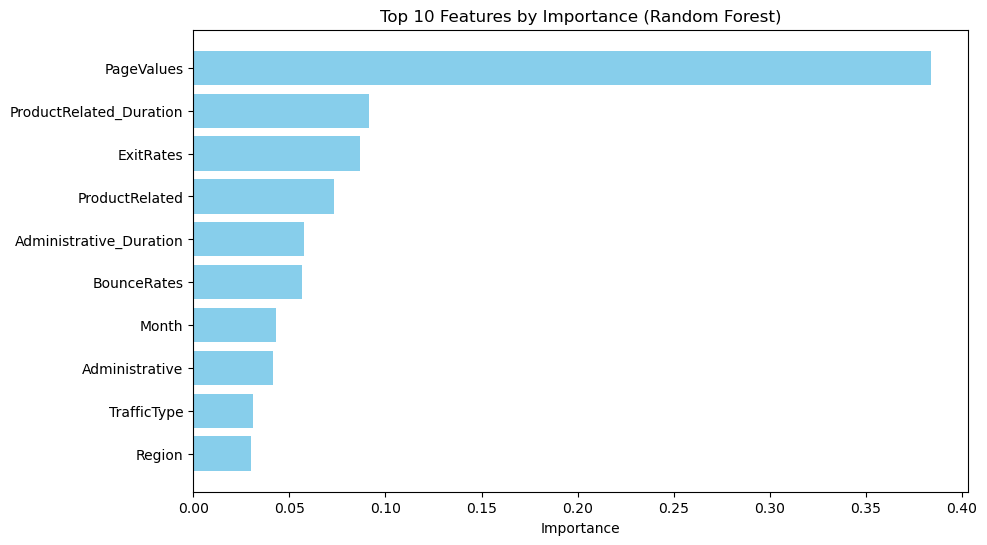

In [71]:

# Separate features and target
X = df_encoder.drop(columns=['Revenue'])  
y = df_encoder['Revenue']

# Build Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract Feature Importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importances.head(10))

# Plot Feature Importance

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Features by Importance (Random Forest)')
plt.xlabel('Importance')
plt.show()

#### 8.2 Select K Best

Top Features Selected by SelectKBest:
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'VisitorType'],
      dtype='object')


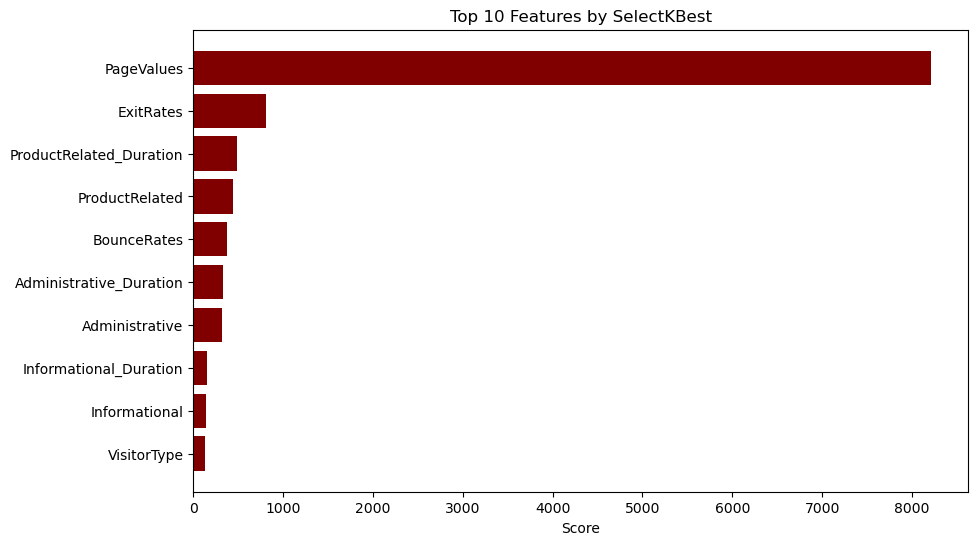

In [73]:


k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get Selected Features
selected_features = X.columns[selector.get_support()]
print("Top Features Selected by SelectKBest:")
print(selected_features)

# Display scores for all features
scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
scores = scores.sort_values(by='Score', ascending=False)

# Plot Top Features
plt.figure(figsize=(10, 6))
plt.barh(scores['Feature'][:10], scores['Score'][:10], color='maroon')
plt.gca().invert_yaxis()
plt.title('Top 10 Features by SelectKBest')
plt.xlabel('Score')
plt.show()


#### 8.3 Compare and Remove Redundant/Irrelevant Features

In [75]:


# Select features based on threshold (Random Forest)
threshold = 0.01  # Set importance threshold
selected_rf_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']

# Intersection of Random Forest and SelectKBest features
final_features = list(set(selected_rf_features) & set(selected_features))
print("Final Selected Features:", final_features)

# Update DataFrame with selected features
X_final = X[final_features]


Final Selected Features: ['PageValues', 'Administrative_Duration', 'VisitorType', 'BounceRates', 'ProductRelated', 'Informational_Duration', 'Administrative', 'ProductRelated_Duration', 'Informational', 'ExitRates']


### **9. Feature Scaling**

In [77]:
# Define numerical columns for scaling (exclude categorical/encoded features)
numerical_cols = [
    'Administrative', 'Administrative_Duration', 'Informational', 
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]
# Define categorical features (encoded or ordinal)
categorical_cols = ['Month', 'VisitorType', 'Weekend', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']



#### 9.1 Min-max Scaling

In [79]:

# Scale numerical features only
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoder[numerical_cols] = scaler.fit_transform(df_encoder[numerical_cols])


In [80]:
df_encoder[numerical_cols].head().T


,0,1,2,3,4
Administrative,0.000000,0.000000,0.000000,0.000000,0.000000
Administrative_Duration,0.000000,0.000000,0.000000,0.000000,0.000000
Informational,0.000000,0.000000,0.000000,0.000000,0.000000
Informational_Duration,0.000000,0.000000,0.000000,0.000000,0.000000
ProductRelated,0.037662,0.053262,0.037662,0.053262,0.119098
ProductRelated_Duration,0.000000,0.377218,0.000000,0.117410,0.582252
BounceRates,1.000000,0.000000,1.000000,0.852181,0.539297
ExitRates,1.000000,0.895129,1.000000,0.962277,0.673264
PageValues,0.000000,0.000000,0.000000,0.000000,0.000000
SpecialDay,0.000000,0.000000,0.000000,0.000000,0.000000


In [81]:
df_encoder[categorical_cols].head().T

,0,1,2,3,4
Month,2.000000,2.000000,2.000000,2.000000,2.000000
VisitorType,2.000000,2.000000,2.000000,2.000000,2.000000
Weekend,0.000000,0.000000,0.000000,0.000000,1.000000
OperatingSystems,0.631798,0.949834,1.303728,1.155158,1.155158
Browser,0.476538,0.621517,0.476538,0.621517,0.690059
Region,1.000000,1.000000,9.000000,2.000000,1.000000
TrafficType,1.000000,2.000000,3.000000,4.000000,4.000000


### **10. Split Data into Training and Testing Sets**

In [83]:

# Features (selected ones) and Target
X = X_final  # Use the final selected features
y = df_encoder['Revenue']  # Target variable


#Target variable Revenue is an imbalanced class. (e.g., significantly more False than True), 
#using stratified sampling to maintain the same class distribution in both training and testing sets

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution
print("Training Set Class Distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting Set Class Distribution:")
print(y_test.value_counts(normalize=True))

# Display the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Set Class Distribution:
Revenue
False    0.843712
True     0.156288
Name: proportion, dtype: float64

Testing Set Class Distribution:
Revenue
False    0.843507
True     0.156493
Name: proportion, dtype: float64
Training Features Shape: (9764, 10)
Testing Features Shape: (2441, 10)
Training Target Shape: (9764,)
Testing Target Shape: (2441,)


### 11. **Build the ML Model:**


In [85]:

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP Classifier': MLPClassifier(random_state=42, max_iter=300),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boost': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42, algorithm='SAMME')
}

# Train classifiers and store results
trained_models = {}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)  # Train the model
    trained_models[name] = clf  # Save the trained model
print("\nTraining Complete!")


Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training MLP Classifier...
Training Naive Bayes...
Training Random Forest...
Training K-Nearest Neighbors...
Training Gradient Boost...
Training AdaBoost...

Training Complete!


In [130]:
#Saving trained models
import joblib
joblib.dump(trained_models, "trained_models.pkl")  


['trained_models.pkl']

### 12. **Model Evaluation:**


Evaluating Logistic Regression...
Accuracy: 0.88
Confusion Matrix:
 [[1836  223]
 [  79  303]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.96      0.89      0.92      2059
    Purchase       0.58      0.79      0.67       382

    accuracy                           0.88      2441
   macro avg       0.77      0.84      0.80      2441
weighted avg       0.90      0.88      0.88      2441

ROC AUC: 0.90


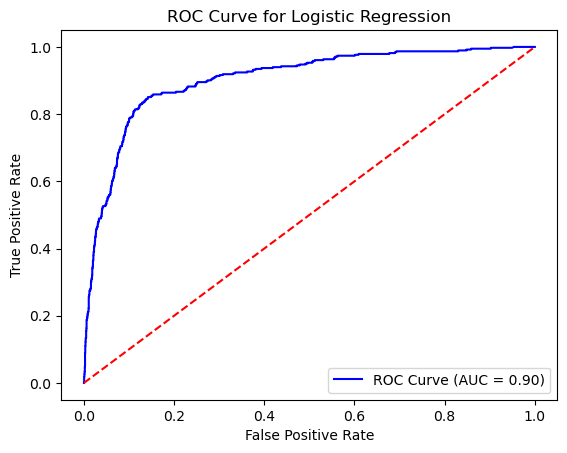


Evaluating SVM...
Accuracy: 0.89
Confusion Matrix:
 [[1922  137]
 [ 130  252]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.94      0.93      0.94      2059
    Purchase       0.65      0.66      0.65       382

    accuracy                           0.89      2441
   macro avg       0.79      0.80      0.79      2441
weighted avg       0.89      0.89      0.89      2441

ROC AUC: 0.84


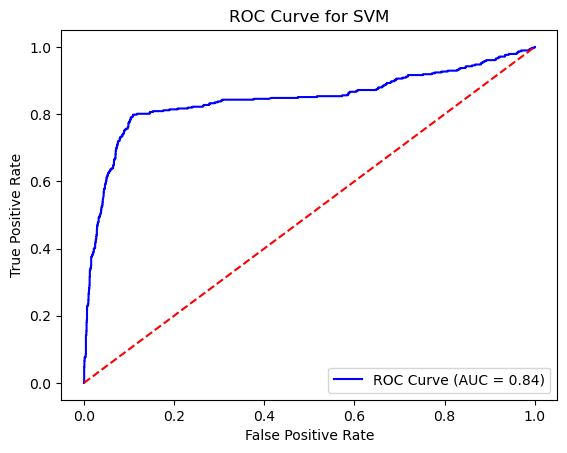


Evaluating Decision Tree...
Accuracy: 0.86
Confusion Matrix:
 [[1871  188]
 [ 163  219]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.92      0.91      0.91      2059
    Purchase       0.54      0.57      0.56       382

    accuracy                           0.86      2441
   macro avg       0.73      0.74      0.73      2441
weighted avg       0.86      0.86      0.86      2441

ROC AUC: 0.73


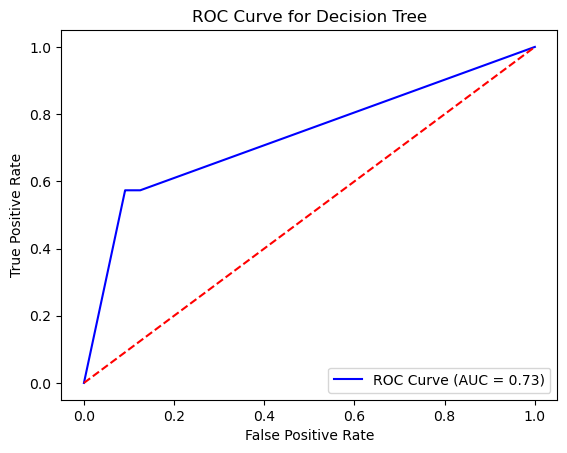


Evaluating MLP Classifier...
Accuracy: 0.89
Confusion Matrix:
 [[2011   48]
 [ 212  170]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.90      0.98      0.94      2059
    Purchase       0.78      0.45      0.57       382

    accuracy                           0.89      2441
   macro avg       0.84      0.71      0.75      2441
weighted avg       0.89      0.89      0.88      2441

ROC AUC: 0.91


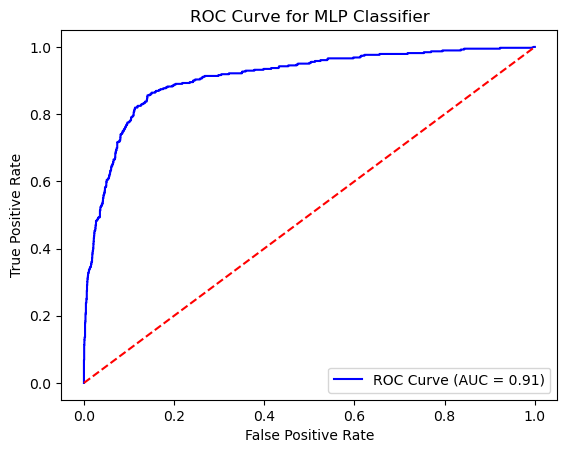


Evaluating Naive Bayes...
Accuracy: 0.84
Confusion Matrix:
 [[1752  307]
 [  77  305]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.96      0.85      0.90      2059
    Purchase       0.50      0.80      0.61       382

    accuracy                           0.84      2441
   macro avg       0.73      0.82      0.76      2441
weighted avg       0.89      0.84      0.86      2441

ROC AUC: 0.88


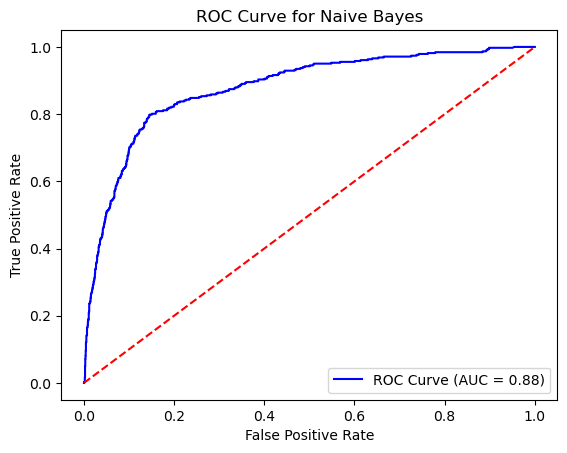


Evaluating Random Forest...
Accuracy: 0.90
Confusion Matrix:
 [[1979   80]
 [ 175  207]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.92      0.96      0.94      2059
    Purchase       0.72      0.54      0.62       382

    accuracy                           0.90      2441
   macro avg       0.82      0.75      0.78      2441
weighted avg       0.89      0.90      0.89      2441

ROC AUC: 0.90


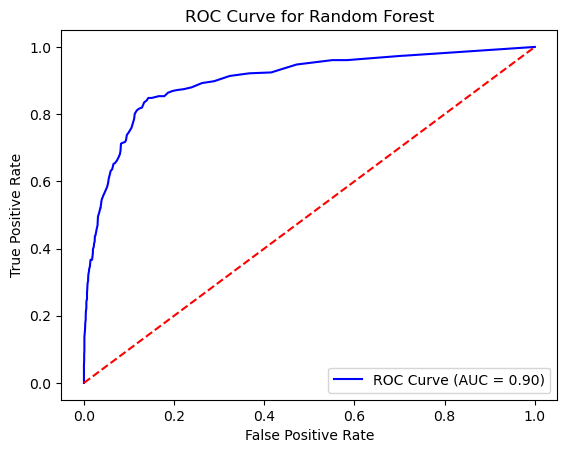


Evaluating K-Nearest Neighbors...
Accuracy: 0.89
Confusion Matrix:
 [[1957  102]
 [ 170  212]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.92      0.95      0.94      2059
    Purchase       0.68      0.55      0.61       382

    accuracy                           0.89      2441
   macro avg       0.80      0.75      0.77      2441
weighted avg       0.88      0.89      0.88      2441

ROC AUC: 0.86


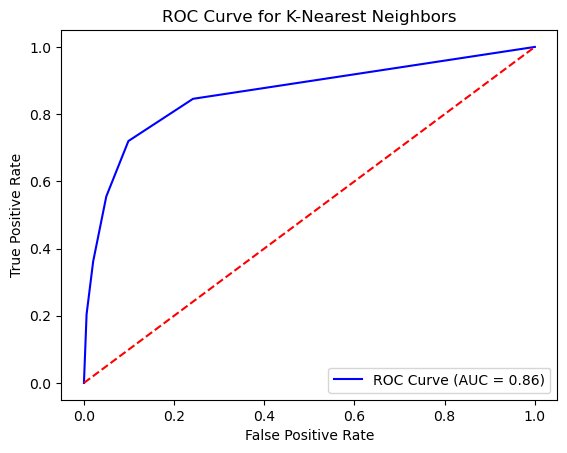


Evaluating Gradient Boost...
Accuracy: 0.90
Confusion Matrix:
 [[1978   81]
 [ 162  220]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.92      0.96      0.94      2059
    Purchase       0.73      0.58      0.64       382

    accuracy                           0.90      2441
   macro avg       0.83      0.77      0.79      2441
weighted avg       0.89      0.90      0.90      2441

ROC AUC: 0.91


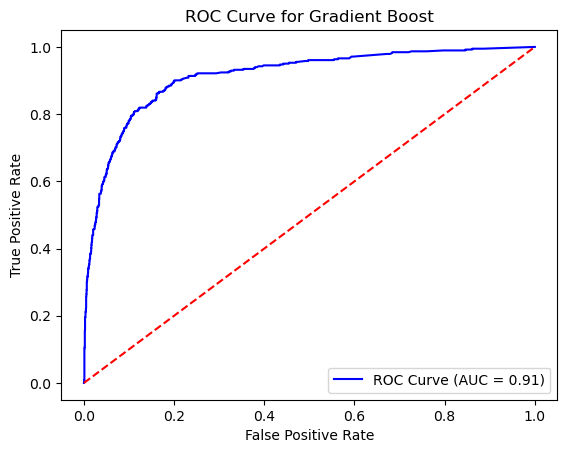


Evaluating AdaBoost...
Accuracy: 0.89
Confusion Matrix:
 [[1933  126]
 [ 141  241]]
Classification Report:
               precision    recall  f1-score   support

 No Purchase       0.93      0.94      0.94      2059
    Purchase       0.66      0.63      0.64       382

    accuracy                           0.89      2441
   macro avg       0.79      0.78      0.79      2441
weighted avg       0.89      0.89      0.89      2441

ROC AUC: 0.90


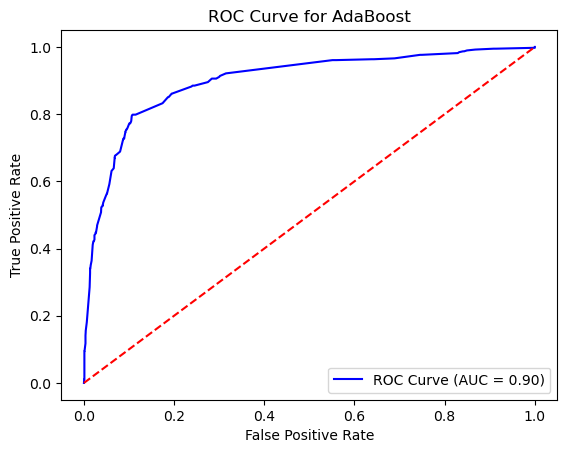

In [134]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

# Initialize a dictionary to store evaluation metrics
results = {}

for name, clf in trained_models.items():
    print(f"\nEvaluating {name}...")
    y_pred = clf.predict(X_test)  # Predicted labels
    y_pred_proba = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None  # Predicted probabilities

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['No Purchase', 'Purchase'])
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    # Save results
    results[name] = {
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': report,
        'ROC AUC': auc
    }

    # Print results
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", report)
    if y_pred_proba is not None:
        print(f"ROC AUC: {auc:.2f}")

    # Plot ROC Curve (if probabilities are available)
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {name}')
        plt.legend(loc='lower right')
        plt.show()


#### 12.1 Summary of evaluation

| Model               | Accuracy | Precision (Purchase) | Recall (Purchase) | F1-Score (Purchase) | ROC-AUC |
|---------------------|----------|-----------------------|--------------------|----------------------|---------|
| Logistic Regression | 0.88     | 0.58                 | 0.79              | 0.67                | 0.90    |
| SVM                 | 0.89     | 0.65                 | 0.66              | 0.65                | 0.84    |
| Decision Tree       | 0.86     | 0.54                 | 0.57              | 0.56                | 0.73    |
| MLP Classifier      | 0.89     | 0.78                 | 0.45              | 0.57                | 0.91    |
| Naive Bayes         | 0.84     | 0.50                 | 0.80              | 0.61                | 0.88    |
| Random Forest       | 0.90     | 0.72                 | 0.54              | 0.62                | 0.90    |
| K-Nearest Neighbors | 0.89     | 0.68                 | 0.55              | 0.61                | 0.86    |
| Gradient Boost      | 0.90     | 0.73                 | 0.58              | 0.64                | 0.91    |
| AdaBoost            | 0.89     | 0.66                 | 0.63              | 0.64                | 0.90    |


#### **12.2 Key Observations**


**1. Best Accuracy:**

Random Forest and Gradient Boost achieved the highest accuracy (90%).
MLP Classifier, SVM, and AdaBoost closely followed with 89%.

**2. Precision for Purchase:**

MLP Classifier had the highest precision (78%), indicating fewer false positives.
Gradient Boost and Random Forest also performed well in terms of precision (72-73%).

**3. Recall for Purchase:**

Logistic Regression and Naive Bayes excelled in recall (79% and 80%, respectively), meaning they captured most of the Purchase cases.
Other models like Gradient Boost and AdaBoost achieved moderate recall (63-58%).

**4. F1-Score for Purchase:**

Logistic Regression and Gradient Boost performed best overall with balanced F1-scores (67% and 64%).

**5. ROC-AUC:**

Gradient Boost, MLP Classifier, and Random Forest achieved the highest ROC-AUC scores (91%, 91%, and 90%), indicating good overall classification performance.

#### **12.3 4. Final Selection**



Overall Performance: Gradient Boost or Random Forest.

High Recall        : Logistic Regression or Naive Bayes.

Precision          : MLP Classifier.